In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re

# Display settings
pd.set_option('display.max_colwidth', None)

In [31]:
# Load the dataset
data_path = "../data/raw/Scam_Not_scam.csv"  # Adjust the path if necessary
df = pd.read_csv(data_path)

# Display basic info and preview
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   about_me         200 non-null    object
 1   label            200 non-null    int64 
 2   contact details  200 non-null    int64 
dtypes: int64(2), object(1)
memory usage: 4.8+ KB


,about_me,label,contact details
0,A︇︆︈l︇︆︈l︇︆︈ ︇︆︈m︇︆︈y︇︆︈ ︇︆︈s︇︆︈e︇︆︈x︇︆︈y︇︆︈ ︇︆︈p︇︆︈h︇︆︈o︇︆︈t︇︆︈o︇︆︈s︇︆︈ ︇︆︈a︇︆︈n︇︆︈d︇︆︈ ︇︆︈v︇︆︈i︇︆︈d︇︆︈e︇︆︈o︇︆︈s︇︆︈ ︇︆︈,1,1
1,"solo busco que me traten como una princesa y me vuelvan más caprichosa de lo que soy, busco un papi bueno que me cumpla los caprichos 💋.rn mi Instagram lun4aa.22",1,1
2,buenas tardes yo busco conocer personas yo quiero alguien que me entienda y queme allude en los económico porque soy una persona muy pobre pero tampoco soy interesada no me gusta pedirle a nadie y tampoco Nome gusta mentirle Ami pareja,1,0
3,Tex бO78OѲ4らч8,1,1
4,"soy madre soltera tengo un hijo de 13 años, soy auxiliar de enfermería, hogareña, romántica, fiel, honesta, busco amistad sincera y transparente inicialmente me gustaría encontrar una persona que me ayude económicamente y si nos entendemos, me gustaría tener una relación seria",1,0


- 200 rows with 3 columns:
- `about_me`: Text descriptions provided by users.
- `label`: Indicates if the content is unacceptable (1 = unacceptable, 0 = acceptable).
- `contact details`: Indicates if contact details are present (1 = yes, 0 = no).


In [32]:
df.isnull().sum()

about_me           0
label              0
contact details    0
dtype: int64

There are no missing values in the dataset. This means the data is complete, and I don't need to impute or remove rows/columns due to null values.


label
0    104
1     96
Name: count, dtype: int64
contact details
0    152
1     48
Name: count, dtype: int64


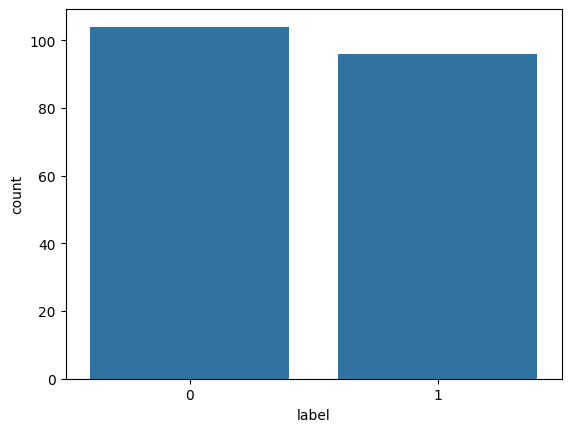

In [33]:
print(df['label'].value_counts())
print(df['contact details'].value_counts())
sns.countplot(data=df, x='label')
plt.show()

- `0`: 104 rows have acceptable content.
- `1`: 96 rows contain unacceptable content.
- Classes are balanced which is good for training a classification model as it reduces need for balancing techniques like oversampling or undersampling.

In [34]:
def clean_text(text):
    text = text.lower()
    text = re.sub(r'\s+', ' ', text)  # Remove extra spaces
    text = re.sub(r'[^\w\s]', '', text)  # Remove punctuation
    return text

df['cleaned_about_me'] = df['about_me'].apply(clean_text)
df[['about_me', 'cleaned_about_me']].head()

,about_me,cleaned_about_me
0,A︇︆︈l︇︆︈l︇︆︈ ︇︆︈m︇︆︈y︇︆︈ ︇︆︈s︇︆︈e︇︆︈x︇︆︈y︇︆︈ ︇︆︈p︇︆︈h︇︆︈o︇︆︈t︇︆︈o︇︆︈s︇︆︈ ︇︆︈a︇︆︈n︇︆︈d︇︆︈ ︇︆︈v︇︆︈i︇︆︈d︇︆︈e︇︆︈o︇︆︈s︇︆︈ ︇︆︈,all my sexy photos and videos
1,"solo busco que me traten como una princesa y me vuelvan más caprichosa de lo que soy, busco un papi bueno que me cumpla los caprichos 💋.rn mi Instagram lun4aa.22",solo busco que me traten como una princesa y me vuelvan más caprichosa de lo que soy busco un papi bueno que me cumpla los caprichos rn mi instagram lun4aa22
2,buenas tardes yo busco conocer personas yo quiero alguien que me entienda y queme allude en los económico porque soy una persona muy pobre pero tampoco soy interesada no me gusta pedirle a nadie y tampoco Nome gusta mentirle Ami pareja,buenas tardes yo busco conocer personas yo quiero alguien que me entienda y queme allude en los económico porque soy una persona muy pobre pero tampoco soy interesada no me gusta pedirle a nadie y tampoco nome gusta mentirle ami pareja
3,Tex бO78OѲ4らч8,tex бo78oѳ4らч8
4,"soy madre soltera tengo un hijo de 13 años, soy auxiliar de enfermería, hogareña, romántica, fiel, honesta, busco amistad sincera y transparente inicialmente me gustaría encontrar una persona que me ayude económicamente y si nos entendemos, me gustaría tener una relación seria",soy madre soltera tengo un hijo de 13 años soy auxiliar de enfermería hogareña romántica fiel honesta busco amistad sincera y transparente inicialmente me gustaría encontrar una persona que me ayude económicamente y si nos entendemos me gustaría tener una relación seria


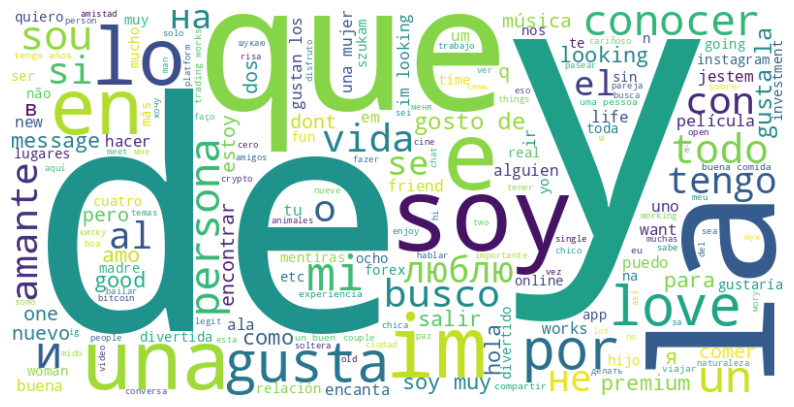

In [35]:
from wordcloud import WordCloud

text = " ".join(df['cleaned_about_me'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

## Дослідження датасету

Приклади текстів у датасеті
1. Прийнятний контент (`label = 0`):
    - Прийнятні тексти зазвичай описують особисті інтереси характеристики чи бажання без образливих висловлювань або шахрайських мотивів
2. Неприйнятний контент ('label = 1'):
    - Тексти з ознаками шахрайства маніпуляцій або нецензурної лексики
    - Часто зустрічаються прямі запити на гроші чи обіцянки нездійсненних вигод
3. Контактна інформація (`contact details = 1`)
    - Тексти, що містять:
        - Електронні адреси
        - Телефони
        - Посилання на соцмережі

### Висновки

- Неприйнятний контент часто включає шахрайські запити нецензурну лексику або особисті вигоди
- Контактна інформація легко визначається за допомогою регулярних виразів (regex) для email телефонів і соцмереж
- Прийнятний контент здебільшого нейтральний або позитивний